In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep", desat=.65)

In [2]:
def poisson_pmf(x , mu):
    return np.exp(-mu) * mu**x / np.math.factorial(x)

In [3]:
def poisson_cdf(x, mu):
    prob = np.zeros(x)
    for i in range(0, x):
        prob[i] = poisson_pmf(i+1, 10)
    return np.cumsum(prob)[-1]

In [4]:
def poisson_inv_cdf(p, mu):
    low = 0.0
    high = 0.0
    for x in range(1, 20):
        s = poisson_pmf(x, mu)
        high += s
        if p>=low and p<=high:
            return x
        low += s
    return np.random.randint(100)

In [5]:
def generate_poisson_samples(no_of_samples):
    X = []
    U = np.random.uniform(0, 1, no_of_samples)
    for u in U:
        X.append(poisson_inv_cdf(u, 10))
    return X

In [6]:
def confidence_interval(mu, std, n_samples):
    upper_limit = mu + 1.96 * (std / np.sqrt(n_samples))
    lower_limit = mu - 1.96 * (std / np.sqrt(n_samples))
    return (upper_limit, lower_limit)

In [35]:
def experiment(no_of_times, no_of_samples, distribution):
    sample_mean = []
    counter1 = 0
    counter2 = 0
    counter3 = 0
    confidence_interval_1 = [9.99, 10.01]
    confidence_interval_2 = [9.9, 10.1]
    actual_mean = 10
    
    for i in range(no_of_times):
        c = np.mean(np.random.poisson(10, no_of_samples))
        sample_mean.append(c)
        
        (u,l) = confidence_interval(c, np.sqrt(c), no_of_samples)
        if actual_mean>u or actual_mean<l:
            counter3 +=1
    
    mu = np.mean(sample_mean)
    std = np.std(sample_mean)
    
    (upper_limit, lower_limit) = confidence_interval(mu, std, n_samples)
    
    for each in sample_mean:
        if each >= confidence_interval_1[0] and each <= confidence_interval_1[1]:
            counter1 += 1
        if each >= confidence_interval_2[0] and each <= confidence_interval_2[1]:
            counter2 += 1
        #if each > upper_limit or each < lower_limit:
            #counter3 += 1
    
    plt.hist(sample_mean, bins = 1000, edgecolor='black', linewidth=1.2)
    plt.text(10.07, 40, r'$\mu=%f,\ \sigma=%f$' % (mu, std))
    plt.xlabel('Observations')
    plt.ylabel('Frequency')
    plt.title('Histogram for sample_size = %d' %  (no_of_samples))
    plt.grid(True)
    plt.show()
    
    return (mu, std, counter1, counter2, upper_limit, lower_limit, counter3)

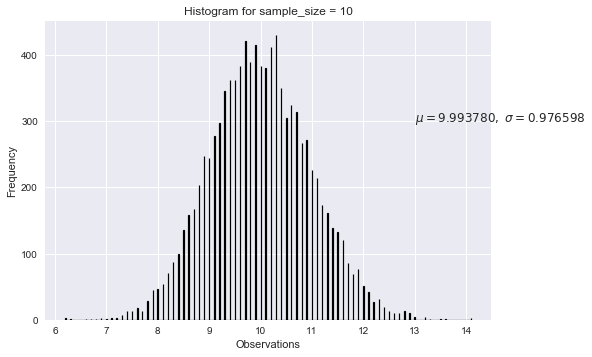

95% Confidence Interval for N = 10 is [9.388478 , 10.599082]
477 times True mean lies out of the 95% Confidence interval
Sample Mean lies in the interval [9.99, 10.01] 383 times for sample_size, N = 10
Sample Mean lies in the interval [9.9, 10.1] 1178 times for sample_size, N = 10


In [27]:
n_samples = 10

(mu, std, counter1,counter2, upper_limit, lower_limit, counter3) = experiment(10000, n_samples, 'Poisson')

print('95%% Confidence Interval for N = %d is [%f , %f]' % (n_samples, lower_limit, upper_limit))
print('%d times True mean lies out of the 95%% Confidence interval' % counter3)
print('Sample Mean lies in the interval [9.99, 10.01] %d times for sample_size, N = %d' % (counter1, n_samples))
print('Sample Mean lies in the interval [9.9, 10.1] %d times for sample_size, N = %d' % (counter2, n_samples))

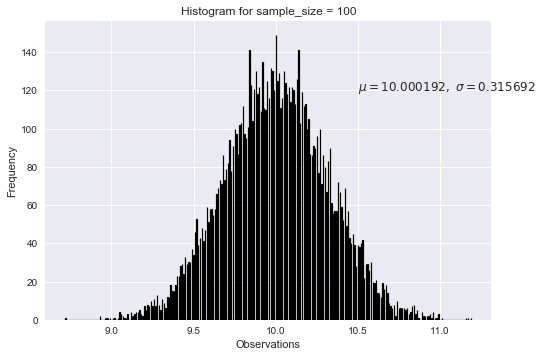

95% Confidence Interval for N = 100 is [9.938316 , 10.062068]
471 times True mean lies out of the 95% Confidence interval
Sample Mean lies in the interval [9.99, 10.01] 394 times for sample_size, N = 100
Sample Mean lies in the interval [9.9, 10.1] 2570 times for sample_size, N = 100


In [29]:
n_samples = 100

(mu, std, counter1,counter2, upper_limit, lower_limit, counter3) = experiment(10000, n_samples, 'Poisson')

print('95%% Confidence Interval for N = %d is [%f , %f]' % (n_samples, lower_limit, upper_limit))
print('%d times True mean lies out of the 95%% Confidence interval' % counter3)
print('Sample Mean lies in the interval [9.99, 10.01] %d times for sample_size, N = %d' % (counter1, n_samples))
print('Sample Mean lies in the interval [9.9, 10.1] %d times for sample_size, N = %d' % (counter2, n_samples))

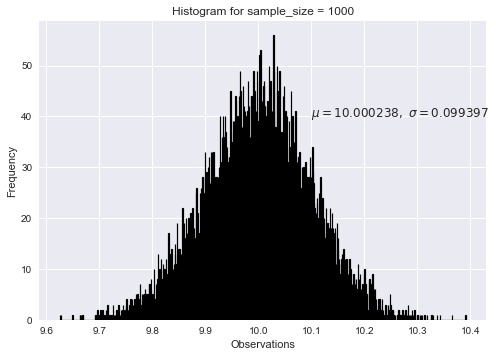

95% Confidence Interval for N = 1000 is [9.994077 , 10.006398]
498 times True mean lies out of the 95% Confidence interval
Sample Mean lies in the interval [9.99, 10.01] 881 times for sample_size, N = 1000
Sample Mean lies in the interval [9.9, 10.1] 6893 times for sample_size, N = 1000


In [34]:
n_samples = 1000

(mu, std, counter1,counter2, upper_limit, lower_limit, counter3) = experiment(10000, n_samples, 'Poisson')

print('95%% Confidence Interval for N = %d is [%f , %f]' % (n_samples, lower_limit, upper_limit))
print('%d times True mean lies out of the 95%% Confidence interval' % counter3)
print('Sample Mean lies in the interval [9.99, 10.01] %d times for sample_size, N = %d' % (counter1, n_samples))
print('Sample Mean lies in the interval [9.9, 10.1] %d times for sample_size, N = %d' % (counter2, n_samples))

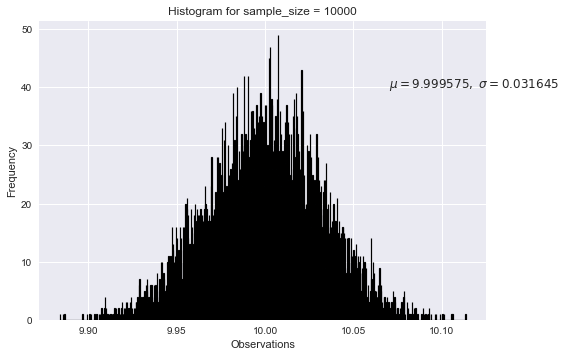

95% Confidence Interval for N = 10000 is [9.998954 , 10.000195]
473 times True mean lies out of the 95% Confidence interval
Sample Mean lies in the interval [9.99, 10.01] 2432 times for sample_size, N = 10000
Sample Mean lies in the interval [9.9, 10.1] 9989 times for sample_size, N = 10000


In [36]:
n_samples = 10000

(mu, std, counter1,counter2, upper_limit, lower_limit, counter3) = experiment(10000, n_samples, 'Poisson')

print('95%% Confidence Interval for N = %d is [%f , %f]' % (n_samples, lower_limit, upper_limit))
print('%d times True mean lies out of the 95%% Confidence interval' % counter3)
print('Sample Mean lies in the interval [9.99, 10.01] %d times for sample_size, N = %d' % (counter1, n_samples))
print('Sample Mean lies in the interval [9.9, 10.1] %d times for sample_size, N = %d' % (counter2, n_samples))